In [1]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sb
sb.set()

from nw2vec import batching

Using TensorFlow backend.


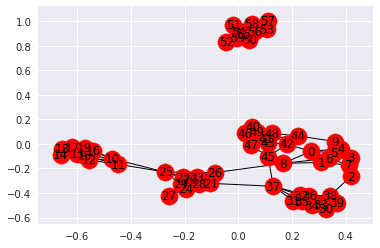

In [2]:
g = nx.planted_partition_graph(6, 10, .5, .005)
layout = nx.drawing.layout.spring_layout(g)
nx.draw_networkx(g, pos=layout)

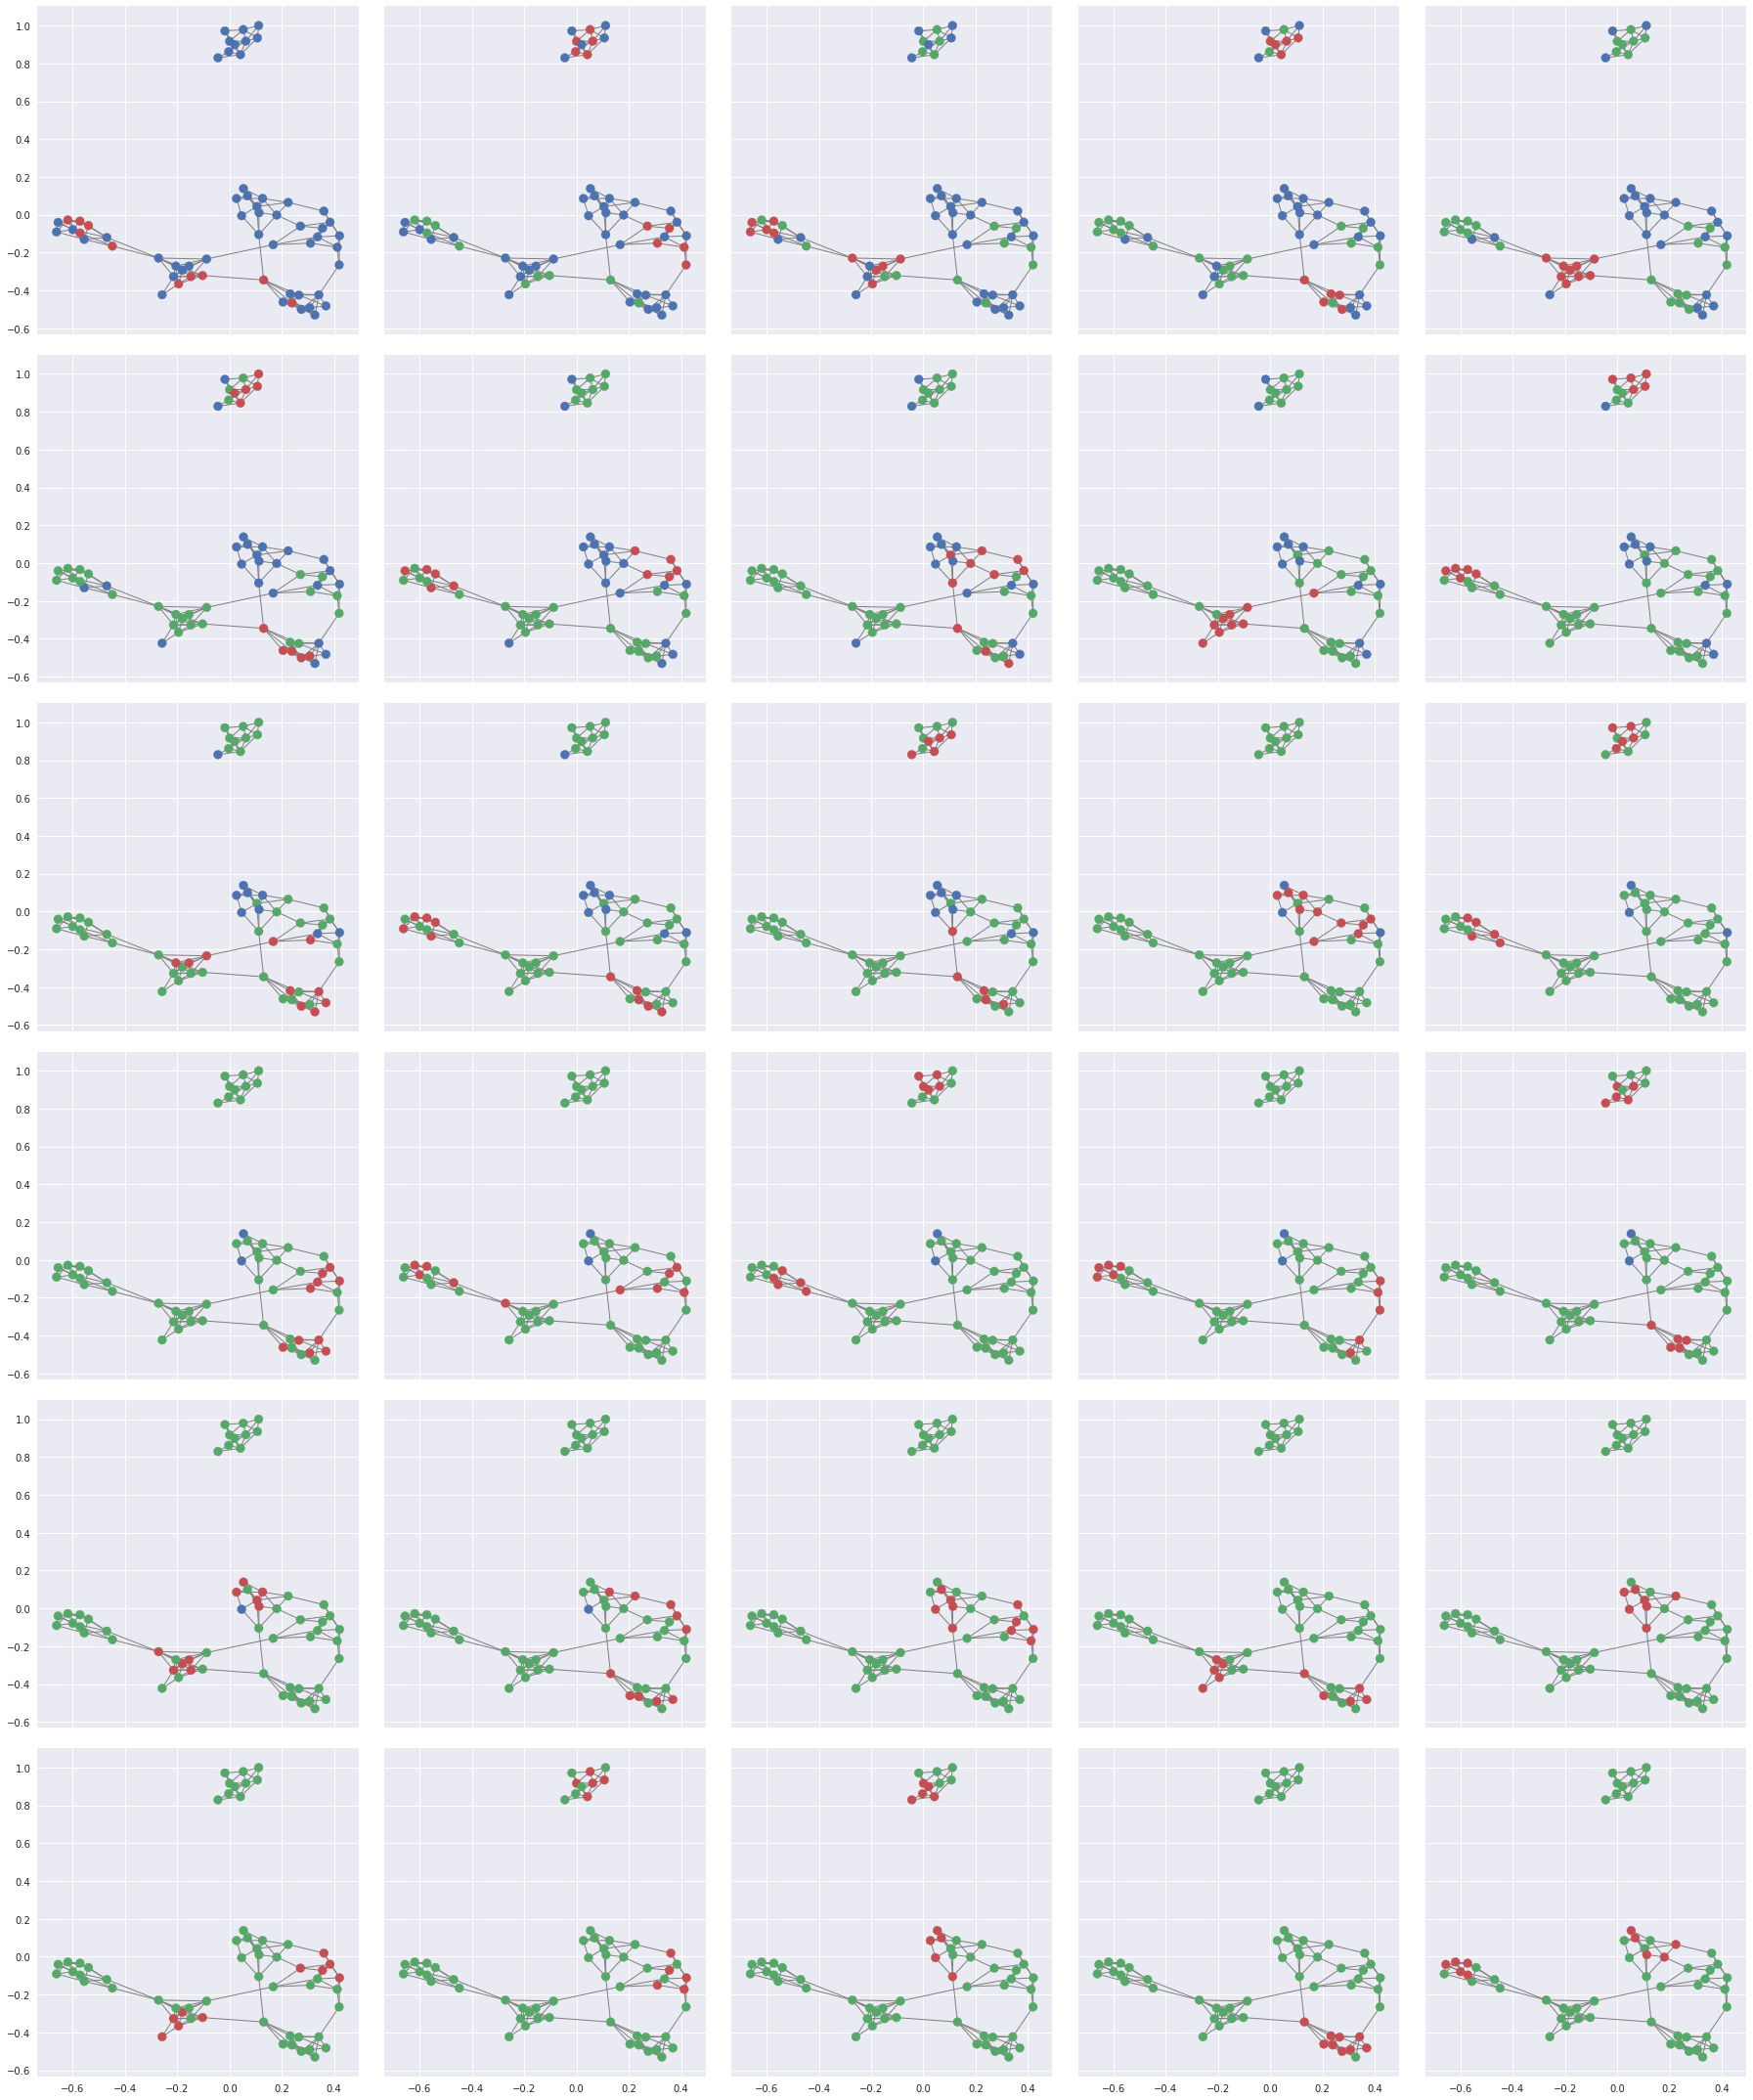

In [4]:
seeds_per_batch = 2
walk_length = 5
n_batches = int(np.ceil(len(g.nodes) / seeds_per_batch))

cols = 5
rows = int(np.ceil(n_batches / cols))
figscale = 5
fig, axes = plt.subplots(rows, cols, figsize=(cols * figscale, rows * figscale), sharex=True, sharey=True)
fig.tight_layout()
blue, green, red = sb.color_palette(n_colors=3)

drawn = set()
for i, nodes in enumerate(batching.batch_walks(nx.adjacency_matrix(g), seeds_per_batch, walk_length)):
    colors = np.ones((len(g.nodes), 3)) * blue
    colors[list(drawn)] = green
    colors[list(nodes)] = red
    nx.draw_networkx(g, pos=layout,
                     node_size=80, with_labels=False,
                     edge_color='grey',
                     node_color=colors, vmin=0, vmax=1,
                     ax=axes[i // cols, i % cols])
    drawn.update(nodes)